# Answers to Hdip Data Analytics - Applied Statistics Module Problems
---
Problems: https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/problems.md

In [82]:
# Import required libraries

# The numpy library provides support for efficient numerical computations and randomization.
# See: https://numpy.org/doc/stable/
import numpy as np
# The matplotlib.pyplot module offers plotting functions for data visualization.
# See: https://matplotlib.org/stable/api/pyplot_api.html
import matplotlib.pyplot as plt
# The seaborn library provides a high-level interface for statistical graphics.
# See: https://seaborn.pydata.org/api.html
import seaborn as sns
# The math module includes mathematical functions and constants.
# See: https://docs.python.org/3/library/math.html#math.comb
from math import comb
# SciPy provides statistical tests, including the independent samples t-test.
# See: https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

In [83]:
# Set Seaborn style
# See: https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", context="notebook")

## Problem 1: Extending the Lady Tasting Tea

This section demonstrates a simulation of an extended version of the famous 'Lady Tasting Tea' experiment. I will simulate the probability that a participant correctly identifies all cups purely by chance. Then, I will compare the extended experiment (12 cups: 8 tea-first, 4 milk-first) with the original design (8 cups: 4 tea-first, 4 milk-first).

### Step 1: Understanding the experiment setup
---

**Original experiment:** 8 cups (4 tea-first, 4 milk-first)

**Extended experiment:** 12 cups (8 tea-first, 4 milk-first)

The participant tries to identify which cups are which. I simulate random guessing many times to estimate the probability of correctly identifying all cups.


### Step 2: Define simulation function
---

This ensures that all random operations in NumPy, including shuffling the cups, are reproducible. By setting a seed, every time I run the notebook, I will get the same simulation results, which is important for consistency and verification in applied statistics.

In [84]:
# Set random seed for reproducibility
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

This function simulates the famous “Lady Tasting Tea” experiment to estimate the probability that she could correctly identify all cups by random chance. It uses random shuffling (np.random.permutation) and counts how many times the guesses match the actual tea/milk assignment. The result approximates the p-value of the experiment.

In [85]:
# Function to simulate the Lady Tasting Tea experiment correctly
def simulate_lady_tasting_tea(n_cups, n_tea_first, n_trials=100000):
    """
    Simulate the Lady Tasting Tea experiment by shuffling cup labels.

    Returns estimated probability of correctly identifying all cups by chance.
    """

    # True arrangement: 1 = tea-first, 0 = milk-first
    # Create an array representing the actual cup assignment
    # See: https://numpy.org/doc/stable/reference/generated/numpy.array.html
    true = np.array([1]*n_tea_first + [0]*(n_cups - n_tea_first))

    correct = 0
    # Repeat the simulation for n_trials
    for _ in range(n_trials):
        # Random guess produced by shuffling the labels
        # See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
        guess = np.random.permutation(true)

        # Success if the entire tea/milk pattern matches
        # See: https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html
        if np.array_equal(guess, true):
            correct += 1

    # Return the estimated probability of a correct guess
    return correct / n_trials

### Step 3: Run simulations
---

I run the simulations for the two experiment designs. 

For the original experiment, I call `simulate_lady_tasting_tea(8, 4)`, which represents 8 cups with 4 tea-first. This function returns the estimated probability of a perfect guess occurring purely by chance for this setup. 

For the extended experiment, I call `simulate_lady_tasting_tea(12, 8)`, which represents 12 cups with 8 tea-first, and again returns the estimated probability of correctly guessing all cups by chance.

In [86]:
# Run the simulation for both experiment designs.
prob_original = simulate_lady_tasting_tea(8, 4)
prob_extended = simulate_lady_tasting_tea(12, 8)

In [87]:
# Print estimated probabilities with appropriate decimal precision
print(f"Estimated probability (Original 8-cup): {prob_original:.8f}")
print(f"Estimated probability (Extended 12-cup): {prob_extended:.12f}")

Estimated probability (Original 8-cup): 0.01459000
Estimated probability (Extended 12-cup): 0.002010000000


### Step 4: Theoretical probability and validation
---

The theoretical probability is calculated to validate the simulation results. As the Lady Tasting Tea experiment has a known exact solution based on counting the number of possible arrangements, comparing the simulated probability with the theoretical value helps confirm that the simulation is correctly implemented. This validation strengthens the reliability of the results and demonstrates understanding of both analytical and simulation based statistical methods.

In [107]:
# Calculate theoretical probabilities using combinatorial formulas.
prob_theoretical_original = 1 / comb(8, 4)
prob_theoretical_extended = 1 / comb(12, 8)

# Comparing simulated vs theoretical side-by-side
print("Original: simulated =", prob_original, "theoretical =", prob_theoretical_original)
print("Extended: simulated =", prob_extended, "theoretical =", prob_theoretical_extended)

Original: simulated = 0.01459 theoretical = 0.014285714285714285
Extended: simulated = 0.00201 theoretical = 0.00202020202020202


### Step 5: Compare the results
---

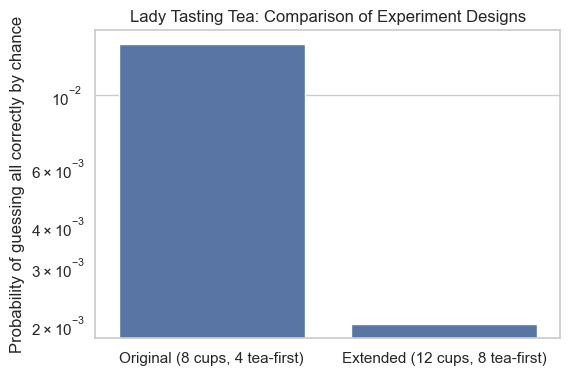

In [89]:
# The seaborn.barplot function creates a bar plot for visual comparison.
# See: https://seaborn.pydata.org/generated/seaborn.barplot.html
# The matplotlib.pyplot.yscale function sets the scaling of the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html

plt.figure(figsize=(6,4))

labels = ["Original (8 cups, 4 tea-first)", "Extended (12 cups, 8 tea-first)"]
values = [prob_theoretical_original, prob_theoretical_extended]

sns.barplot(x=labels, y=values)
plt.ylabel("Probability of guessing all correctly by chance")
plt.title("Lady Tasting Tea: Comparison of Experiment Designs")
plt.yscale("log")  # probabilities differ substantially
plt.show()

### Step 6: Interpretation
---

In the original experiment with 8 cups (4 tea-first and 4 milk-first), the probability of correctly identifying all cups by random guessing is relatively small. When the experiment is extended to 12 cups with 8 tea-first and 4 milk-first, the number of possible ways to assign the tea-first cups increases substantially.

As a result, the probability of correctly guessing all cups by chance becomes even smaller in the extended experiment. This shows that increasing the total number of cups while requiring the correct identification of more tea-first cups makes the test more stringent and reduces the likelihood of success due to random guessing.

Therefore, the extended design provides stronger evidence against chance performance and increases the reliability of conclusions drawn from the experiment.

## Problem 2: Normal Distribution
---

Problem statement:

 Generate 100,000 samples of size 10 from the standard normal distribution.
 For each sample, compute the standard deviation using:
   - ddof=1 (sample SD)
   - ddof=0 (population SD)


 Plot histograms of both sets of SD values on the same axes with transparency.

 
 Describe the differences and explain how you expect these differences to change as sample size increases.

### Step 1: Set up the simulation
---

In this problem, I investigate how the standard deviation behaves when estimated from small samples drawn from a standard normal distribution. I generate a large number of samples so that I can study the *sampling distribution* of the standard deviation.

I use two different definitions of standard deviation:
- `ddof = 0`, which divides by N and treats the data as a full population,
- `ddof = 1`, which divides by (N − 1) and is commonly used when estimating variability from a sample.

In [90]:
# Set random seed for reproducibility
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

In [91]:
# Number of simulation samples
n_samples = 100000

# Size of each sample
sample_size = 10

# Standard normal distribution parameters
mu, sigma = 0, 1

### Step 2: Generate the samples
---

I generate 100,000 independent samples, each of size 10, from a standard normal distribution with mean 0 and standard deviation 1. Each row of the resulting array represents one sample.

Using a large number of samples allows me to clearly observe systematic differences between the two standard deviation estimators rather than random noise.

In [92]:
# The numpy.random.normal function supports generating a 2D array of shape (n_samples, sample_size).
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
samples = np.random.normal(loc=mu, scale=sigma, size=(n_samples, sample_size))

### Step 3: Compute standard deviations with `ddof=0` and `ddof=1`
---

For each sample, I compute the standard deviation twice: once using `ddof = 0` and once using `ddof = 1`. This allows me to compare how the choice of divisor affects the estimated variability when the sample size is small.

The key difference is that `ddof = 1` adjusts for the fact that the population mean is unknown and must be estimated from the sample.

In [93]:
# The numpy.std function computes the standard deviation; the ddof parameter changes the divisor:
#   - ddof=0 uses N in the denominator (population SD)
#   - ddof=1 uses (N-1) in the denominator (sample SD)
# See: https://numpy.org/doc/stable/reference/generated/numpy.std.html
sd_ddof0 = np.std(samples, axis=1, ddof=0)
sd_ddof1 = np.std(samples, axis=1, ddof=1)

print(f"Mean SD (ddof=0): {sd_ddof0.mean():.4f}")
print(f"Mean SD (ddof=1): {sd_ddof1.mean():.4f}")

Mean SD (ddof=0): 0.9228
Mean SD (ddof=1): 0.9727


### Step 4: Plot both histograms on the same axes
---

To compare the two estimators, I plot histograms of the standard deviation values computed with `ddof = 0` and `ddof = 1` on the same axes. Transparency is used so that differences in location and spread can be clearly seen.

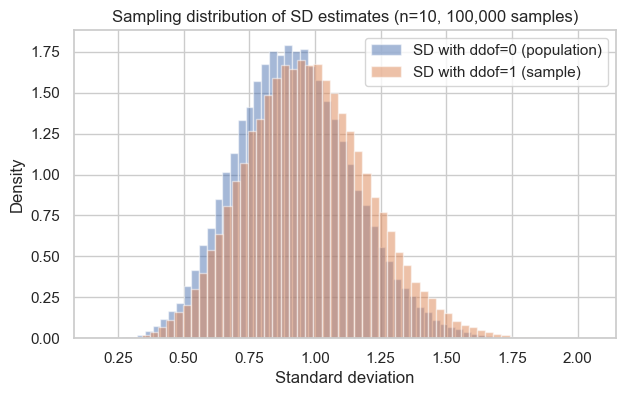

In [94]:
# The matplotlib.pyplot.hist function draws histograms and supports transparency via alpha.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.figure(figsize=(7, 4))

plt.hist(sd_ddof0, bins=60, alpha=0.5, density=True, label="SD with ddof=0 (population)")
plt.hist(sd_ddof1, bins=60, alpha=0.5, density=True, label="SD with ddof=1 (sample)")

plt.title("Sampling distribution of SD estimates (n=10, 100,000 samples)")
plt.xlabel("Standard deviation")
plt.ylabel("Density")
plt.legend()
plt.show()

### Step 5: Interpretation
---

From the histograms, I observe that the distribution of standard deviations computed with `ddof = 1` is shifted slightly to the right compared to `ddof = 0`. This indicates that, on average, the `ddof = 1` estimator produces larger standard deviation values.

This occurs because using `ddof = 0` divides by N and therefore tends to underestimate variability when applied to samples rather than full populations. The `ddof = 1` estimator corrects for this downward bias by dividing by (N − 1).

If the sample size were increased, I would expect the difference between the two distributions to become smaller. As N increases, the difference between N and (N − 1) becomes negligible, and both estimators converge toward the true population standard deviation. In addition, the sampling distributions would become narrower, reflecting more stable estimates of variability.

## Problem 3: t-Test
---

Problem Statement:
A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.

### Step 1: Set up the simulation
---

In this simulation, I investigate how the probability of a Type II error changes as the true difference between two population means increases. I fix the sample size and significance level so that the only factor affecting the test’s performance is the magnitude of the mean difference.

In [95]:
# Set random seed for reproducibility
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

In [96]:
# Significance level
alpha = 0.05

# Sample size per group
n = 100

# Simulations per d value
n_reps = 1000

In [97]:
# The numpy.arange function generates evenly spaced values.
# See: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
d_values = np.arange(0.0, 1.0 + 0.1, 0.1)

In [98]:
# We will store the proportion of 'fail to reject' for each d.
fail_to_reject_rates = []

### Step 2: Run the simulation
---

For each value of d, I repeatedly generate two independent samples and apply a two-sided independent samples t-test. By repeating this process many times, I can estimate the probability of failing to reject the null hypothesis for each true mean difference.

In [99]:
# The numpy.random.normal function draws samples from a Normal distribution.
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
for d in d_values:
    fail_count = 0
    for _ in range(n_reps):
        x = np.random.normal(loc=0.0, scale=1.0, size=n)
        y = np.random.normal(loc=d,   scale=1.0, size=n)

        # Two-sided independent samples t-test; assumes equal variances by default (equal_var=True).
        # See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
        t_stat, p_val = stats.ttest_ind(x, y)

        # Reject H0 if p < alpha; otherwise we 'fail to reject'.
        if p_val >= alpha:
            fail_count += 1

    fail_to_reject_rates.append(fail_count / n_reps)

fail_to_reject_rates = np.array(fail_to_reject_rates)

In [100]:
# Print the table of results
for d, rate in zip(d_values, fail_to_reject_rates):
    print(f"d={d:.1f} -> fail-to-reject proportion = {rate:.3f}")

d=0.0 -> fail-to-reject proportion = 0.940
d=0.1 -> fail-to-reject proportion = 0.904
d=0.2 -> fail-to-reject proportion = 0.695
d=0.3 -> fail-to-reject proportion = 0.450
d=0.4 -> fail-to-reject proportion = 0.177
d=0.5 -> fail-to-reject proportion = 0.064
d=0.6 -> fail-to-reject proportion = 0.018
d=0.7 -> fail-to-reject proportion = 0.001
d=0.8 -> fail-to-reject proportion = 0.000
d=0.9 -> fail-to-reject proportion = 0.000
d=1.0 -> fail-to-reject proportion = 0.000


### Step 3: Plot `fail_to_reject` proportion vs d
---


After computing the proportion of times the null hypothesis is not rejected for each value of d, I visualise the results by plotting this proportion against d. This allows me to clearly see how the Type II error rate changes as the effect size increases.

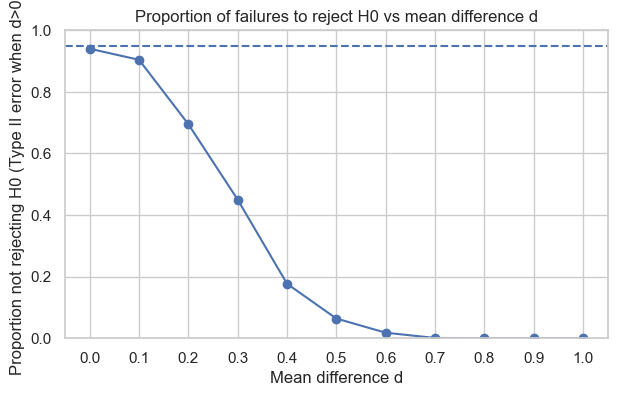

In [101]:
# The matplotlib.pyplot.plot function creates a line plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.figure(figsize=(7, 4))
plt.plot(d_values, fail_to_reject_rates, marker='o')

# The matplotlib.pyplot.axhline function draws a horizontal reference line.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plt.axhline(0.95, linestyle='--')  # reference: around 1-alpha when d=0 (null true)

plt.title("Proportion of failures to reject H0 vs mean difference d")
plt.xlabel("Mean difference d")
plt.ylabel("Proportion not rejecting H0 (Type II error when d>0)")
plt.xticks(d_values)
plt.ylim(0, 1)
plt.show()

### Step 4: Interpretation
---

When d = 0, the null hypothesis is actually true, so the probability of not rejecting H0 should be close to 1 - alpha (about 0.95). This is not a Type II error in that special case; it is simply the expected behaviour when H0 is true.

For d > 0, H0 is false, so 'not rejecting' becomes a Type II error. As d increases, the two group means are further apart, making it easier for the t-test to detect
a difference. Therefore, as the true mean difference increases, the t-test becomes more powerful, and the probability of failing to reject the null hypothesis decreases.

In other words: increasing the true mean difference increases the power of the test, and the Type II error rate falls.

## Problem 4: ANOVA vs Multiple t-Tests
---

Generate three independent samples (n=30 each) from Normal distributions with:
  - means: 0, 0.5, 1
  - standard deviation: 1

Then:

  1) Run a one-way ANOVA to test if all three means are equal.
  2) Run three pairwise independent two-sample t-tests (1 vs 2, 1 vs 3, 2 vs 3).
  3) Compare conclusions.
  
   Finally, I write a note on why ANOVA is preferred over several t-tests.

### Step 1: Generate the three samples
---

In [102]:
# Set random seed for reproducibility
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

In this problem, I generate three independent samples from normal distributions with different means but the same standard deviation. This setup allows me to test whether the observed differences in sample means are statistically significant or could plausibly arise by chance.

In [103]:
# The numpy.random.normal function draws samples from a Normal distribution.
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
n = 30
sigma = 1

x1 = np.random.normal(loc=0.0, scale=sigma, size=n)
x2 = np.random.normal(loc=0.5, scale=sigma, size=n)
x3 = np.random.normal(loc=1.0, scale=sigma, size=n)

print(f"Sample means: x1={np.mean(x1):.3f}, x2={np.mean(x2):.3f}, x3={np.mean(x3):.3f}")

Sample means: x1=-0.188, x2=0.379, x3=1.013


### Step 2: One-way ANOVA
---

I first perform a one-way ANOVA, which tests the single null hypothesis that all three population means are equal. This provides a global test for any difference among the groups.

In [104]:
# scipy.stats.f_oneway performs a one-way ANOVA test.
# See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_stat, p_anova = stats.f_oneway(x1, x2, x3)
print(f"ANOVA: F = {f_stat:.4f}, p = {p_anova:.6f}")

ANOVA: F = 12.2095, p = 0.000021


### Step 3: Pairwise two-sample t-tests
---

Although ANOVA can detect whether at least one mean differs, it does not indicate which groups differ. To investigate this, I perform pairwise independent two-sample t-tests between each pair of samples.

In [105]:
# scipy.stats.ttest_ind performs an independent two-sample t-test.
# See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
alpha = 0.05

pairs = [("1 vs 2", x1, x2), ("1 vs 3", x1, x3), ("2 vs 3", x2, x3)]

t_results = []
for label, a, b in pairs:
    t_stat, p_val = stats.ttest_ind(a, b)
    decision = "Reject H0" if p_val < alpha else "Fail to reject H0"
    t_results.append((label, t_stat, p_val, decision))

for label, t_stat, p_val, decision in t_results:
    print(f"t-test {label}: t = {t_stat:.4f}, p = {p_val:.6f} -> {decision}")

t-test 1 vs 2: t = -2.3981, p = 0.019718 -> Reject H0
t-test 1 vs 3: t = -4.9113, p = 0.000008 -> Reject H0
t-test 2 vs 3: t = -2.5526, p = 0.013347 -> Reject H0


### Step 4: Compare conclusions
---

Running multiple t-tests inflates the family-wise Type I error rate, meaning the probability of at least one false positive increases as more tests are performed. Even if all three population means were equal, performing several t-tests would increase the chance of incorrectly detecting a difference.

ANOVA provides a single overall test that controls the Type I error rate at the chosen significance level. If the ANOVA result is significant, follow-up multiple-comparison procedures can then be used to identify which group means differ while maintaining control over false positives.

---
End